In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-33M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs to me.”

The mean man said “No, it’s mine.”

Katie was very sad. She said “Please, I just want to take it for a walk.”

The mean man thought for a moment and then said “Okay, you can take it. But you must promise to take care of it.”

Katie was so happy. She thanked the mean man and took the cat for a walk. From then on, Katie and her black cat were the best of friends.



In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-8M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs to me!”

Katie was scared, but she knew she had to do something. She said to the man, “We should take the cat home.”

The man agreed, and they took the cat home.

When they got home, Katie's cat was very happy. She had a new home and she was safe.

The moral of the story is that it’s important to be kind and help others. Even if it means taking a walk, it’s better to be kind and help others.



In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-3M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
would take her cat for a walk in the park.

One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
take the cat, to which she replied ”This cat belongs to a bad man.”

Katie was very scared, but she was also very brave. She said “I’m sorry, I’m sorry. I’m sorry, I’m sorry.”

The bad man was very angry. He said “You must not take things that are not yours. You should always ask before you take something that belongs to someone else.”

Katie was very sad. She had been so brave and she had been very brave. She learned a valuable lesson that day.



/tmp/ipykernel_41032/3888440015.py:94: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


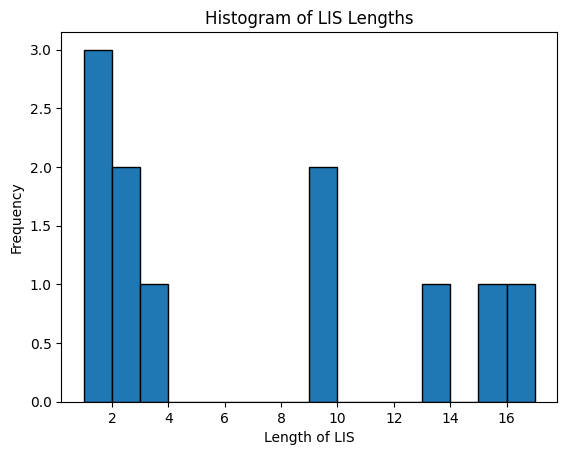

In [16]:
#3M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs"""

    small_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs to a bad man.”
                    
                    Katie was very scared, but she was also very brave. She said “I’m sorry, I’m sorry. I’m sorry, I’m sorry.”
                    
                    The bad man was very angry. He said “You must not take things that are not yours. You should always ask before you take something that belongs to someone else.”

                    Katie was very sad. She had been so brave and she had been very brave. She learned a valuable lesson that day."""

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



/tmp/ipykernel_41032/1453287543.py:96: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


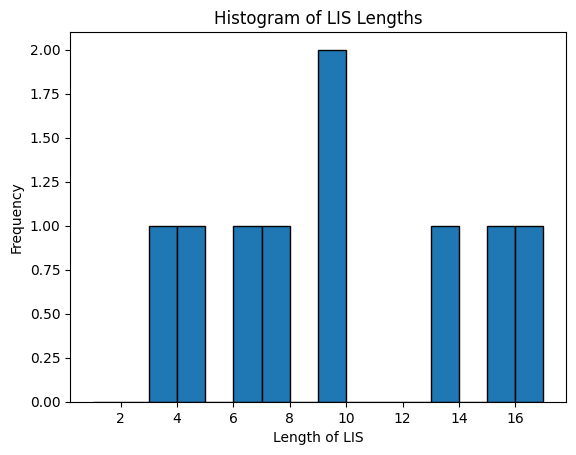

In [17]:
#33M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs"""

    small_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs to me.”
                    
                    The mean man said “No, it’s mine.”
                    
                    Katie was very sad. She said “Please, I just want to take it for a walk.”
                    
                    The mean man thought for a moment and then said “Okay, you can take it. But you must promise to take care of it.”
                    
                    Katie was so happy. She thanked the mean man and took the cat for a walk. From then on, Katie and her black cat were the best of friends."""

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



/tmp/ipykernel_41032/4113788808.py:97: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


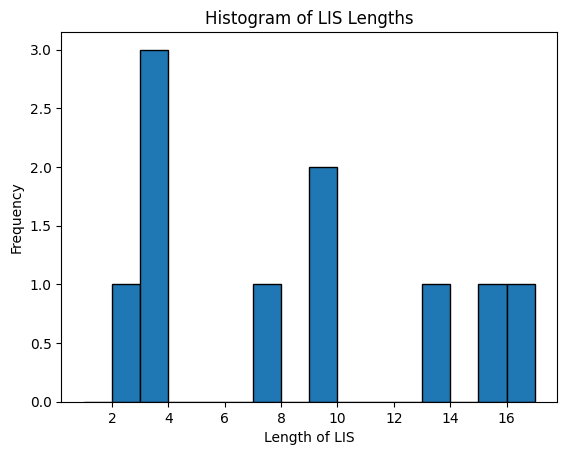

In [18]:
#8M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs"""

    small_text = """Once upon a time, there lived a black cat. The cat belonged to a little girl called Katie. Every day, Katie
                    would take her cat for a walk in the park.
                    
                    One day, as Katie and her cat were walking around, they saw a mean looking man. He said he wanted to
                    take the cat, to which she replied ”This cat belongs to me!”
                    
                    Katie was scared, but she knew she had to do something. She said to the man, “We should take the cat home.”
                    
                    The man agreed, and they took the cat home.
                    
                    When they got home, Katie's cat was very happy. She had a new home and she was safe.
                    
                    The moral of the story is that it’s important to be kind and help others. Even if it means taking a walk, it’s better to be kind and help others."""

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



In [19]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-33M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud noise and a big cloud of dust. Lily was scared and called for her mom. Her mom came and saw the dust. She told Lily that it was just a storm and that they would clean it up later.

Lily and her mom cleaned up the dust together. They put the decorations back in the box and closed it. The next day, the storm was gone and the sun was shining. Lily and her mom went outside to play in the sunshine. They had a fun day together, and Lily was happy that her room was clean and safe.



In [20]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-8M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud noise, like a big boom. Lily was scared, but she remembered what her mommy said.

"Don't worry, Lily. I will protect you from the loud noise," said her mommy.

Lily felt better and went back to decorating her room. She put up pretty pictures and made it look even more beautiful. From that day on, Lily knew that she could always count on her mommy to protect her.



In [21]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('./TinyStories-3M')
tokenizer = AutoTokenizer.from_pretrained("./gpt-neo-125m")
prompt = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud"""
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate completion
output = model.generate(input_ids, max_length = 10000, num_beams=1)

# Decode the completion
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.

As Lily was decorating her room, the sky outside became dark. There was a loud noise and a big storm came. Lily was scared and ran to her room.

But then, she remembered her mom's words. She remembered that she had a special gift for her mom. She took it to her room and put it in her room.

Lily was very happy and proud of her gift. She knew that she had made a new friend and that she could always remember her mom's words.



/tmp/ipykernel_41032/655795730.py:92: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


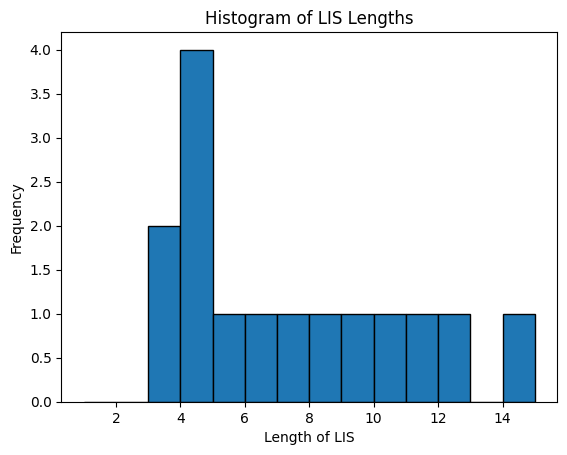

In [22]:
#33M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud"""

    small_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud noise and a big cloud of dust. Lily was scared and called for her mom. Her mom came and saw the dust. She told Lily that it was just a storm and that they would clean it up later.
                    
                    Lily and her mom cleaned up the dust together. They put the decorations back in the box and closed it. The next day, the storm was gone and the sun was shining. Lily and her mom went outside to play in the sunshine. They had a fun day together, and Lily was happy that her room was clean and safe.
                    """

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



/tmp/ipykernel_41032/4023106178.py:93: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


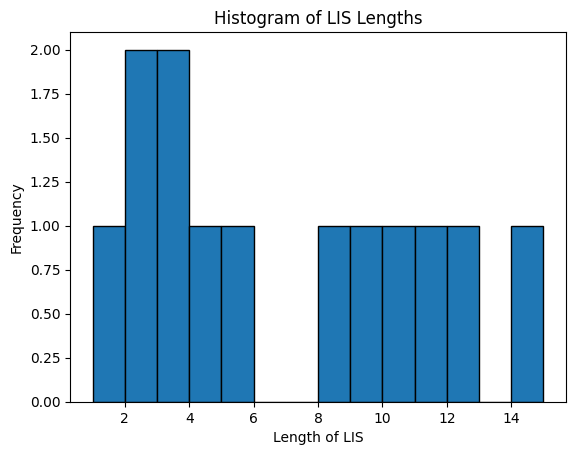

In [23]:
#8M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud"""

    small_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud noise, like a big boom. Lily was scared, but she remembered what her mommy said.
                    
                    "Don't worry, Lily. I will protect you from the loud noise," said her mommy.
                    
                    Lily felt better and went back to decorating her room. She put up pretty pictures and made it look even more beautiful. From that day on, Lily knew that she could always count on her mommy to protect her."""

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



/tmp/ipykernel_41032/2079199157.py:93: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


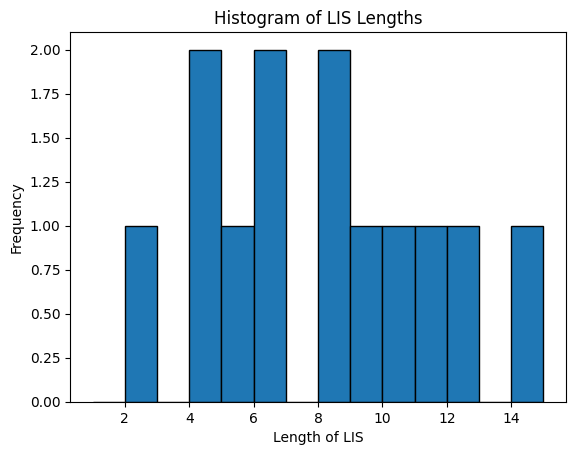

In [24]:
#3M
import re
import matplotlib.pyplot as plt


def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def longest_increasing_subsequence(xs, ys):
    n = len(xs)
    m = len(ys)

    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if xs[i - 1] == ys[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = n, m
    lis = []

    while i > 0 and j > 0:
        if xs[i - 1] == ys[j - 1]:
            lis.append(xs[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    lis.reverse()

    return lis

def annotate_text(small_text, lis):

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_set = set(lis)
    annotated_sentences = []

    for sentence in sentences:
        words = sentence.split()
        annotated_sentence = []
        for word in words:
            if word in lis_set:
                annotated_sentence.append(f"<span style='color: red; font-weight: bold;'>{word}</span>")
                lis_set.remove(word)
            else:
                annotated_sentence.append(word)
        annotated_sentences.append(" ".join(annotated_sentence))

    return "<br>".join(annotated_sentences)

def main():
    # small_file_path = '/content/drive/MyDrive/train_data/out-mobydick-1000iter.txt'
    # large_file_path = '/content/drive/MyDrive/train_data/MobyDick.Gutenberg.txt'

    # small_text = read_text(small_file_path)
    # large_text = read_text(large_file_path)

    large_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud"""

    small_text = """Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
                    day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
                    them in her room.
                    
                    As Lily was decorating her room, the sky outside became dark. There was a loud noise and a big storm came. Lily was scared and ran to her room.
                    
                    But then, she remembered her mom's words. She remembered that she had a special gift for her mom. She took it to her room and put it in her room.
                    
                    Lily was very happy and proud of her gift. She knew that she had made a new friend and that she could always remember her mom's words."""

    sentences = re.split(r'(?<=\w[.!?])\s', small_text)
    lis_lengths = []

    annotated_sentences = []
    for sentence in sentences:
        lis = longest_increasing_subsequence(sentence.split(), large_text.split())
        lis_lengths.append(len(lis))
        annotated_sentences.append(annotate_text(sentence, lis))

    annotated_text = "<br>".join(annotated_sentences)

    from IPython.core.display import display, HTML
    display(HTML(annotated_text))

    plt.hist(lis_lengths, bins=range(1, max(lis_lengths) + 2), edgecolor='black')
    plt.xlabel('Length of LIS')
    plt.ylabel('Frequency')
    plt.title('Histogram of LIS Lengths')
    plt.show()

if __name__ == "__main__":
    main()



In [10]:
pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.8 MB/s eta 0:00:004.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.4 MB/s eta 0:00:006.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.
